In [1]:
import pandas as pd
import matplotlib.pyplot as plt


In [3]:
df=pd.read_csv('../data/ETTm2.csv')
df.drop(['date'], axis=1, inplace=True)
df.head()

,HUFL,HULL,MUFL,MULL,LUFL,LULL,OT
0,41.130001,12.481,36.535999,9.355,4.424,1.311,38.661999
1,39.622002,11.309,35.543999,8.551,3.209,1.258,38.223000
2,38.868000,10.555,34.365002,7.586,4.435,1.258,37.344002
3,35.518002,9.214,32.569000,8.712,4.435,1.215,37.124001
4,37.528000,10.136,33.936001,7.532,4.435,1.215,37.124001


In [176]:
x=df[:200]
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# x = scaler.fit_transform(x)
x


,HUFL,HULL,MUFL,MULL,LUFL,LULL,OT
0,41.130001,12.481,36.535999,9.355,4.424,1.311,38.661999
1,39.622002,11.309,35.543999,8.551,3.209,1.258,38.223000
2,38.868000,10.555,34.365002,7.586,4.435,1.258,37.344002
3,35.518002,9.214,32.569000,8.712,4.435,1.215,37.124001
4,37.528000,10.136,33.936001,7.532,4.435,1.215,37.124001
...,...,...,...,...,...,...,...
195,35.265999,9.885,32.221001,7.827,3.433,0.000,28.115499
196,35.182999,12.063,31.389999,9.784,3.433,1.322,28.554501
197,33.925999,11.644,30.746000,9.730,3.433,0.000,28.554501
198,35.601002,11.057,32.167000,8.846,3.433,0.000,28.554501


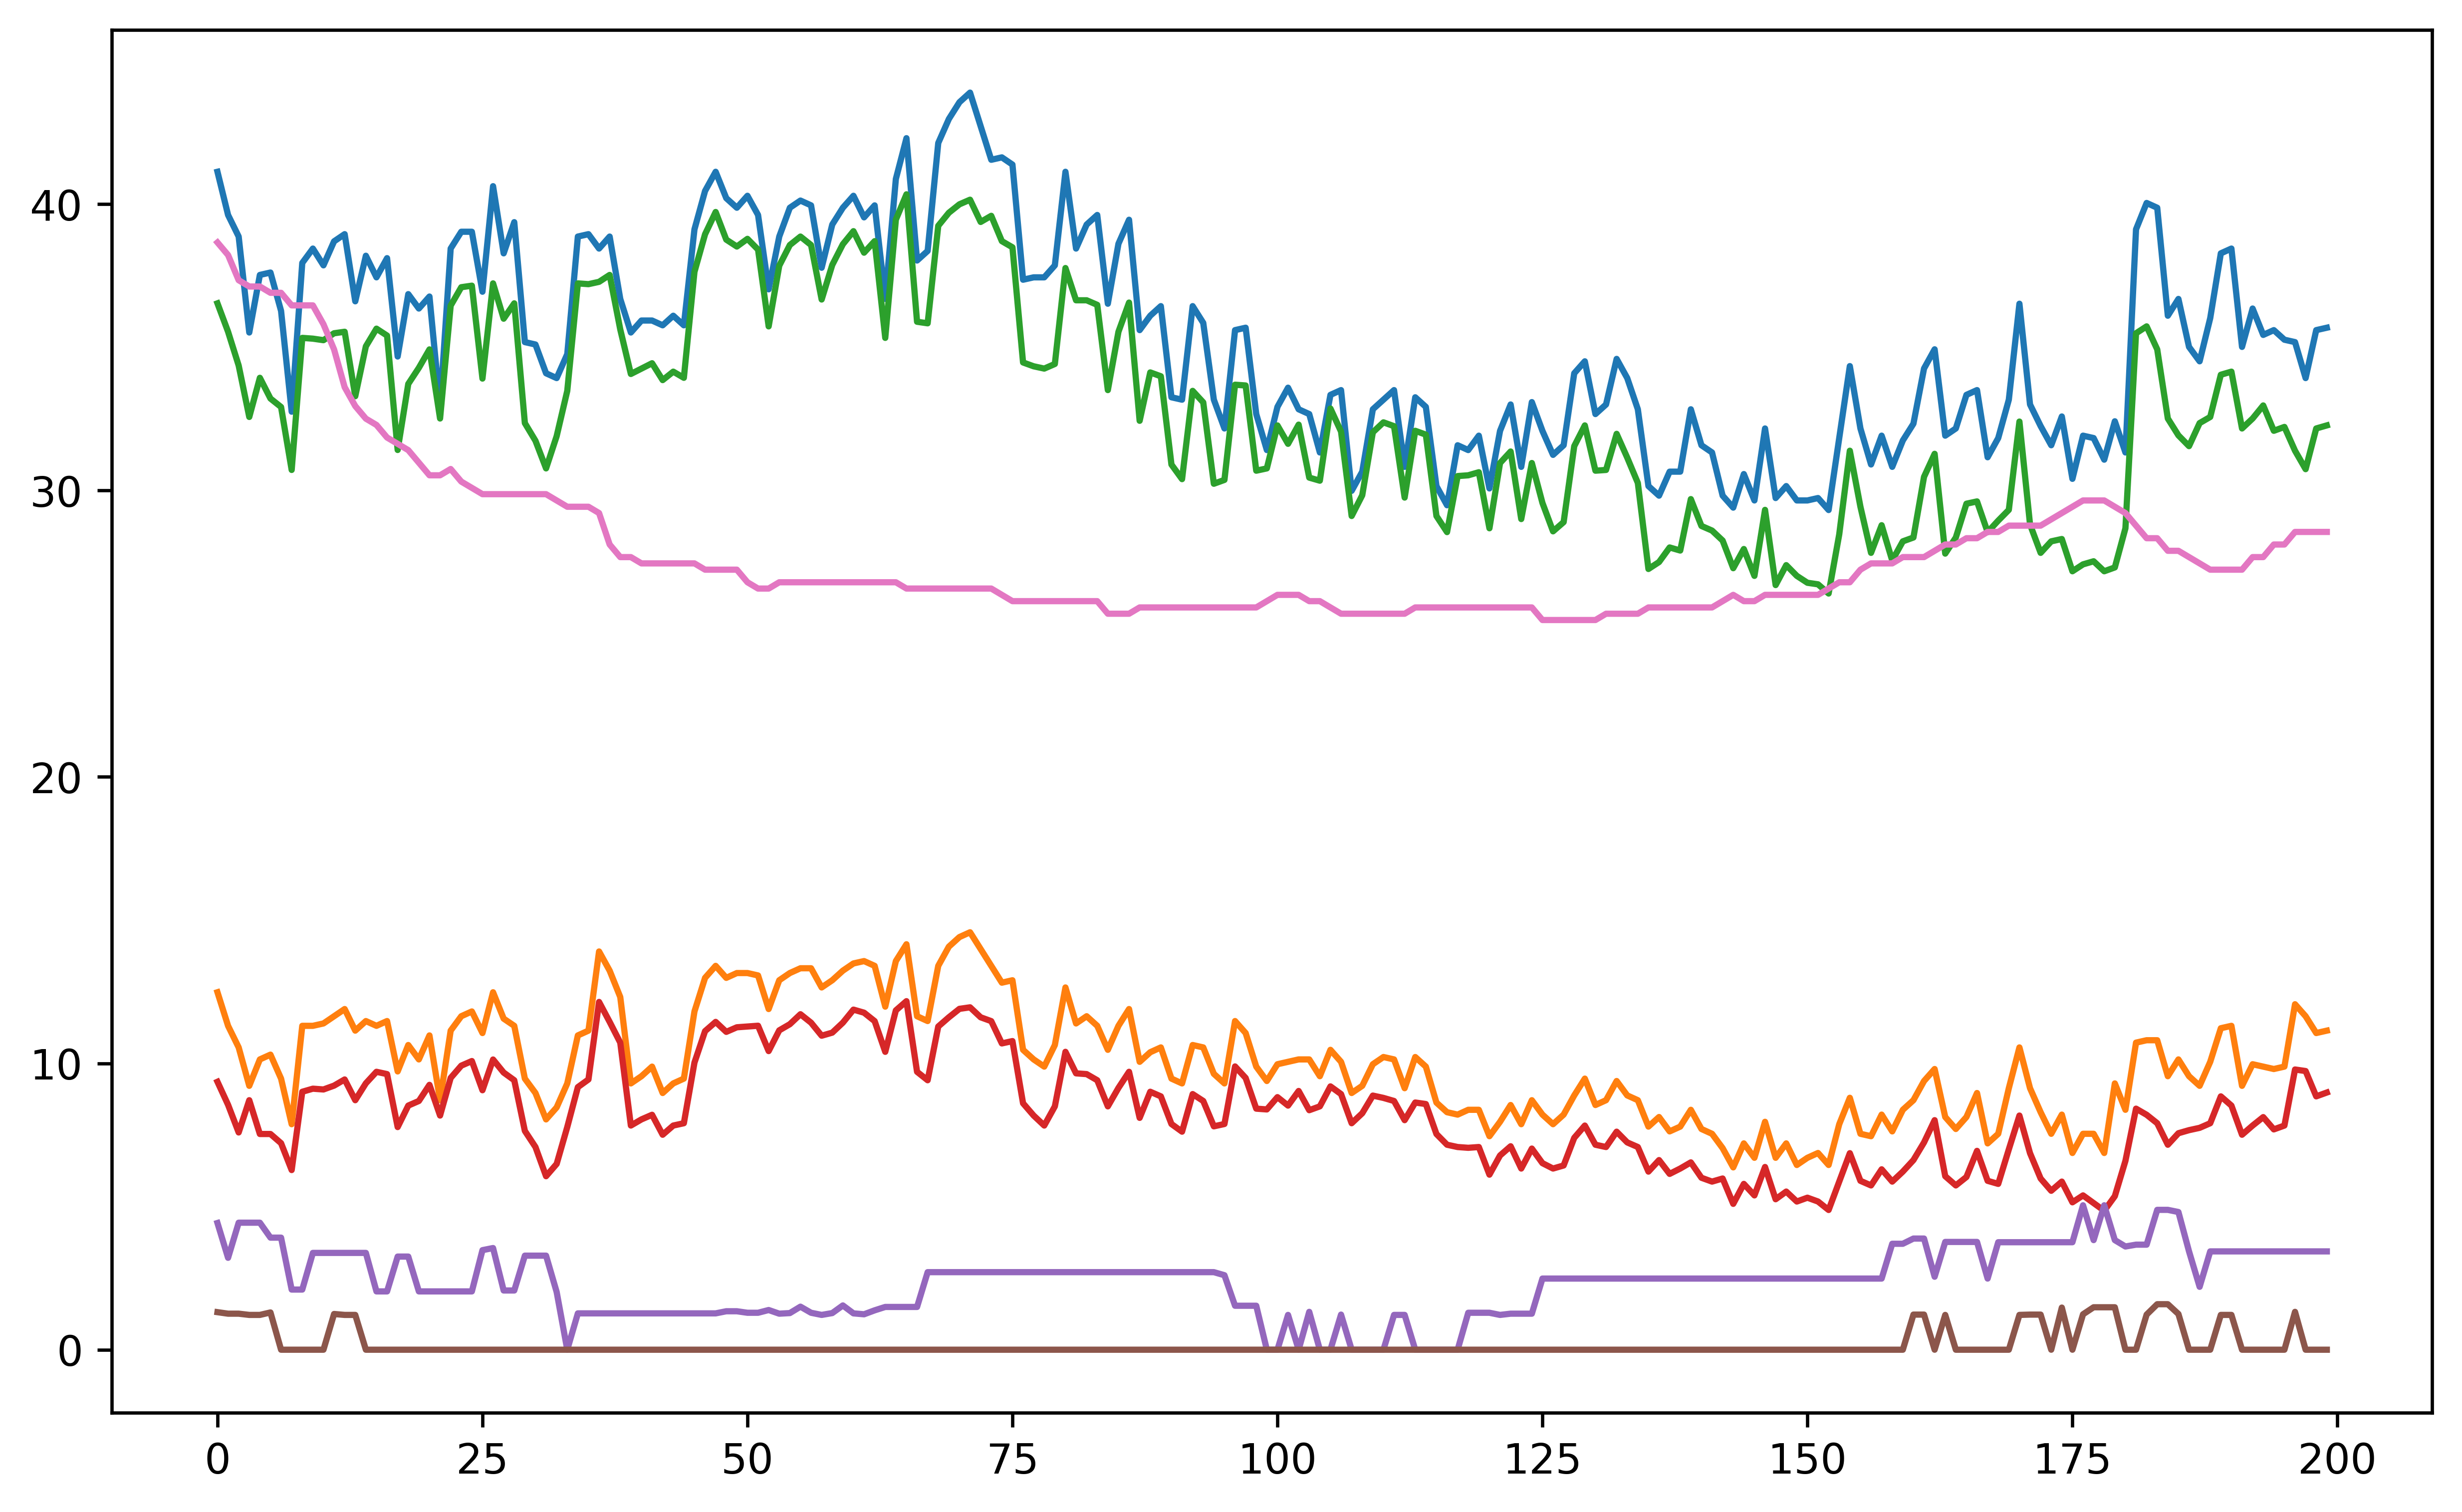

In [177]:
plt.figure(figsize=(10, 6), dpi=600)
# plt.plot(x[:,14:])
plt.plot(x)
# plt.legend(df.columns)
plt.show()

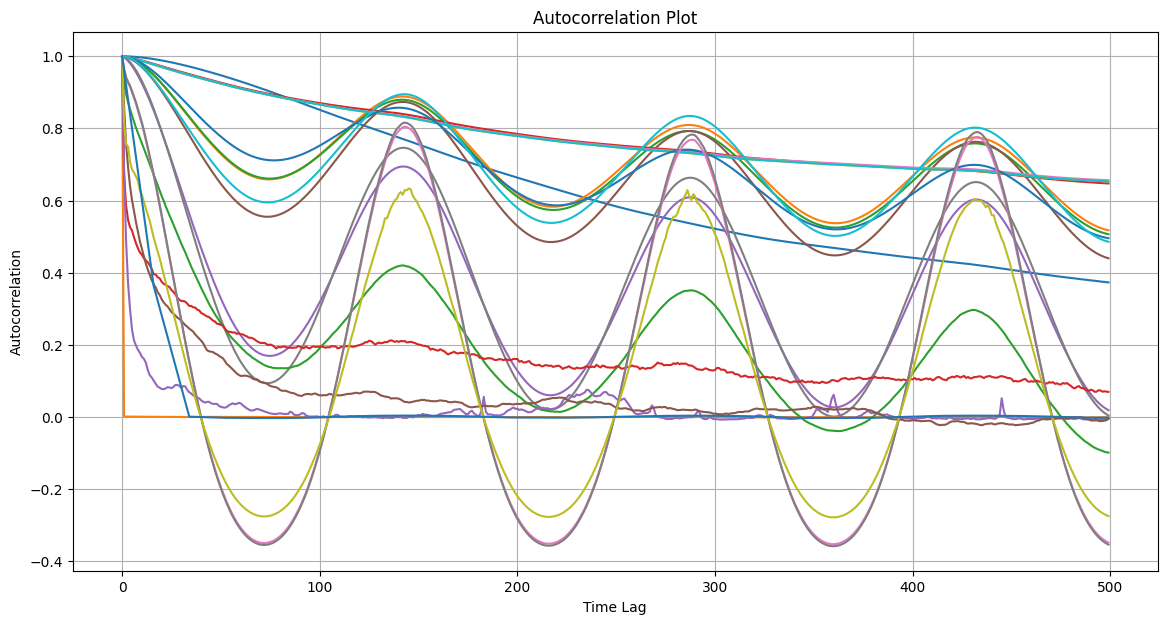

In [4]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

file_path = '../data/weather.csv' 
data = pd.read_csv(file_path)
data.drop(['date'], axis=1, inplace=True)
#data=data[:1000]


def autocorrelation(x):
    """Compute the autocorrelation of the signal x."""
    n = len(x)
    variance = np.var(x)
    x = x - np.mean(x)
    r = np.correlate(x, x, mode='full')[-n:]
    result = r / (variance * (np.arange(n, 0, -1)))
    return result

fig, ax = plt.subplots(figsize=(14, 7))

for column in data.columns:
    series = data[column].dropna()  # Drop NA values if any
    autocorr = autocorrelation(series)
    lags = np.arange(len(autocorr))
    ax.plot(lags, autocorr, linestyle='-', label=column)

ax.set_title('Autocorrelation Plot')
ax.set_xlabel('Time Lag')
ax.set_ylabel('Autocorrelation')
ax.grid(True)
# ax.legend()

plt.show()

/tmp/ipykernel_612744/1247740463.py:37: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  data = data.resample('H').mean()  # Resample to hourly data


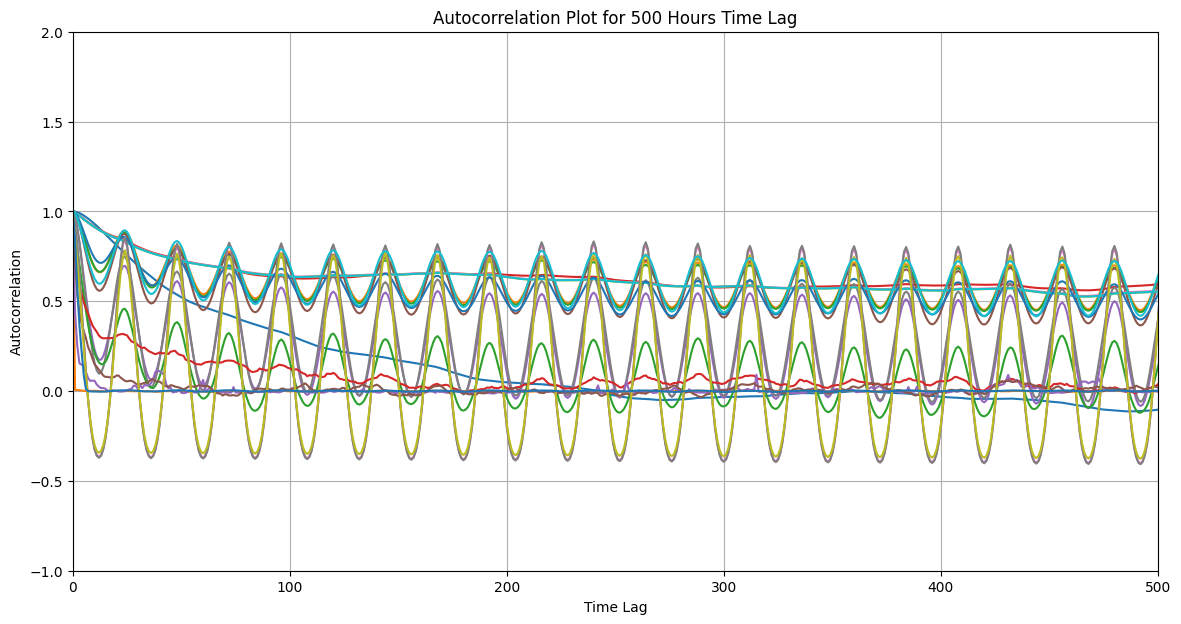

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Assuming the file path is correct and the file contains a 'date' column
file_path = '../data/weather.csv'
data = pd.read_csv(file_path, parse_dates=['date'])

# Drop the 'date' column for the autocorrelation calculation
data_for_autocorr = data.drop(['date'], axis=1)

def autocorrelation(x):
    """Compute the autocorrelation of the signal x."""
    n = len(x)
    variance = np.var(x)
    x = x - np.mean(x)
    r = np.correlate(x, x, mode='full')[-n:]
    result = r / (variance * (np.arange(n, 0, -1)))
    return result

#fig, ax = plt.subplots(figsize=(14, 7))

# for column in data_for_autocorr.columns:
#     series = data_for_autocorr[column].dropna()  # Drop NA values if any
#     autocorr = autocorrelation(series)
#     lags = np.arange(len(autocorr))
#     ax.plot(lags, autocorr, linestyle='-', label=column)

# ax.set_title('Autocorrelation Plot')
# ax.set_xlabel('Time Lag')
# ax.set_ylabel('Autocorrelation')
# ax.grid(True)
# ax.legend()

# Plotting the autocorrelation for 500 hours of time lag using the date (datetime)
data = data.set_index('date')
data = data.resample('H').mean()  # Resample to hourly data

fig, ax = plt.subplots(figsize=(14, 7))

for column in data.columns:
    series = data[column].dropna()  # Drop NA values if any
    autocorr = autocorrelation(series)
    lags = np.arange(len(autocorr))
    ax.plot(lags, autocorr, linestyle='-', label=column)

ax.set_title('Autocorrelation Plot for 500 Hours Time Lag')
ax.set_xlabel('Time Lag')
ax.set_ylabel('Autocorrelation')
ax.grid(True)
#ax.legend()
ax.set_xlim(0, 500)  # Set the x-axis limit to 500 hours
ax.set_ylim(-1,2)
plt.show()

In [11]:
data

,Date,0,1,2,3,4,5,6,7,8,...,852,853,854,855,856,857,858,859,860,861
0,2015-01-01 00:00:00,0.0048,0.0146,0.0289,0.0142,0.0064,0.0232,0.0162,0.0242,0.0341,...,0.0051,0.0051,0.0074,0.0079,0.0051,0.0051,0.0339,0.0051,0.0100,0.0121
1,2015-01-01 01:00:00,0.0072,0.0148,0.0350,0.0174,0.0084,0.0240,0.0201,0.0338,0.0434,...,0.0036,0.0036,0.0107,0.0058,0.0036,0.0036,0.0348,0.0036,0.0087,0.0136
2,2015-01-01 02:00:00,0.0040,0.0101,0.0267,0.0124,0.0049,0.0170,0.0127,0.0255,0.0332,...,0.0030,0.0030,0.0043,0.0050,0.0030,0.0030,0.0327,0.0030,0.0061,0.0107
3,2015-01-01 03:00:00,0.0039,0.0060,0.0218,0.0090,0.0029,0.0118,0.0088,0.0163,0.0211,...,0.0033,0.0033,0.0019,0.0052,0.0033,0.0033,0.0292,0.0033,0.0040,0.0071
4,2015-01-01 04:00:00,0.0042,0.0055,0.0191,0.0082,0.0024,0.0095,0.0064,0.0087,0.0144,...,0.0049,0.0049,0.0011,0.0071,0.0049,0.0049,0.0264,0.0049,0.0040,0.0039
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17539,2016-12-31 19:00:00,0.0342,0.0332,0.1378,0.0559,0.0165,0.0386,0.0457,0.0687,0.0716,...,0.0139,0.0179,0.0278,0.0280,0.0227,0.0375,0.0142,0.0201,0.0341,0.0429
17540,2016-12-31 20:00:00,0.0285,0.0253,0.0542,0.0485,0.0131,0.0331,0.0372,0.0569,0.0669,...,0.0116,0.0155,0.0201,0.0267,0.0207,0.0320,0.0122,0.0163,0.0306,0.0363
17541,2016-12-31 21:00:00,0.0276,0.0257,0.0551,0.0474,0.0121,0.0326,0.0381,0.0566,0.0675,...,0.0109,0.0142,0.0208,0.0252,0.0189,0.0287,0.0123,0.0152,0.0292,0.0325
17542,2016-12-31 22:00:00,0.0232,0.0229,0.0496,0.0435,0.0119,0.0297,0.0361,0.0517,0.0598,...,0.0092,0.0124,0.0219,0.0215,0.0169,0.0258,0.0096,0.0130,0.0252,0.0279


/tmp/ipykernel_612744/1857360890.py:37: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  data = data.resample('H').mean()  # Resample to hourly data


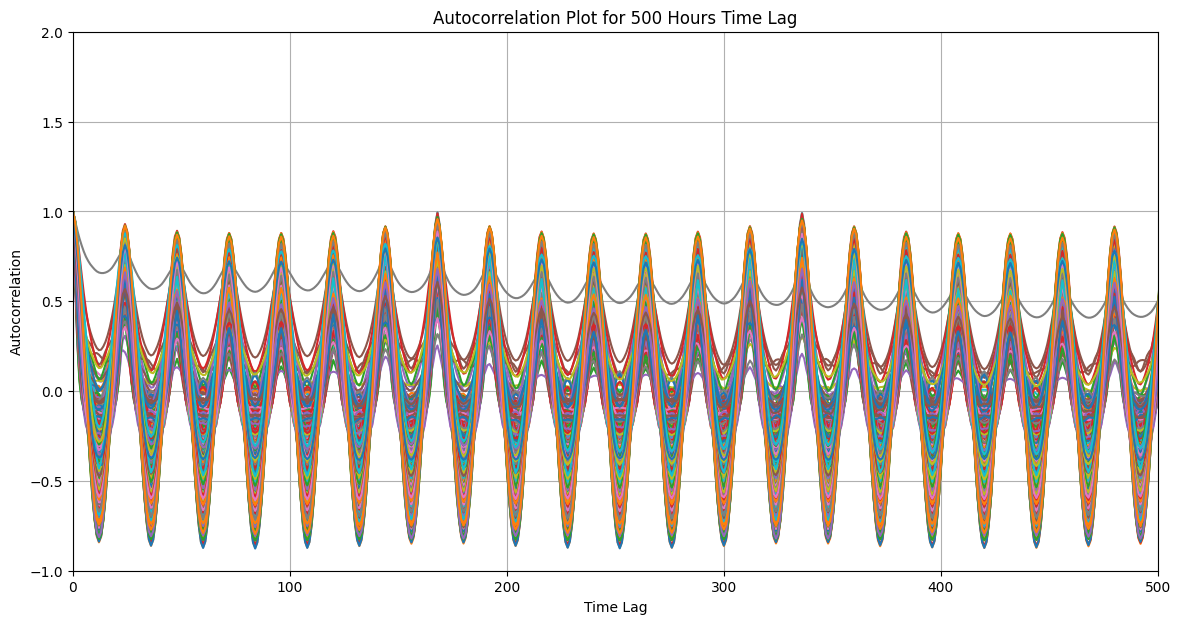

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Assuming the file path is correct and the file contains a 'date' column
file_path = '../data/traffic.csv'
data = pd.read_csv(file_path, parse_dates=['date'])

# Drop the 'date' column for the autocorrelation calculation
data_for_autocorr = data.drop(['date'], axis=1)

def autocorrelation(x):
    """Compute the autocorrelation of the signal x."""
    n = len(x)
    variance = np.var(x)
    x = x - np.mean(x)
    r = np.correlate(x, x, mode='full')[-n:]
    result = r / (variance * (np.arange(n, 0, -1)))
    return result

#fig, ax = plt.subplots(figsize=(14, 7))

# for column in data_for_autocorr.columns:
#     series = data_for_autocorr[column].dropna()  # Drop NA values if any
#     autocorr = autocorrelation(series)
#     lags = np.arange(len(autocorr))
#     ax.plot(lags, autocorr, linestyle='-', label=column)

# ax.set_title('Autocorrelation Plot')
# ax.set_xlabel('Time Lag')
# ax.set_ylabel('Autocorrelation')
# ax.grid(True)
# ax.legend()

# Plotting the autocorrelation for 500 hours of time lag using the date (datetime)
data = data.set_index('date')
data = data.resample('H').mean()  # Resample to hourly data

fig, ax = plt.subplots(figsize=(14, 7))

for column in data.columns:
    series = data[column].dropna()  # Drop NA values if any
    autocorr = autocorrelation(series)
    lags = np.arange(len(autocorr))
    ax.plot(lags, autocorr, linestyle='-', label=column)

ax.set_title('Autocorrelation Plot for 500 Hours Time Lag')
ax.set_xlabel('Time Lag')
ax.set_ylabel('Autocorrelation')
ax.grid(True)
#ax.legend()
ax.set_xlim(0, 500)  # Set the x-axis limit to 500 hours
ax.set_ylim(-1,2)
plt.show()

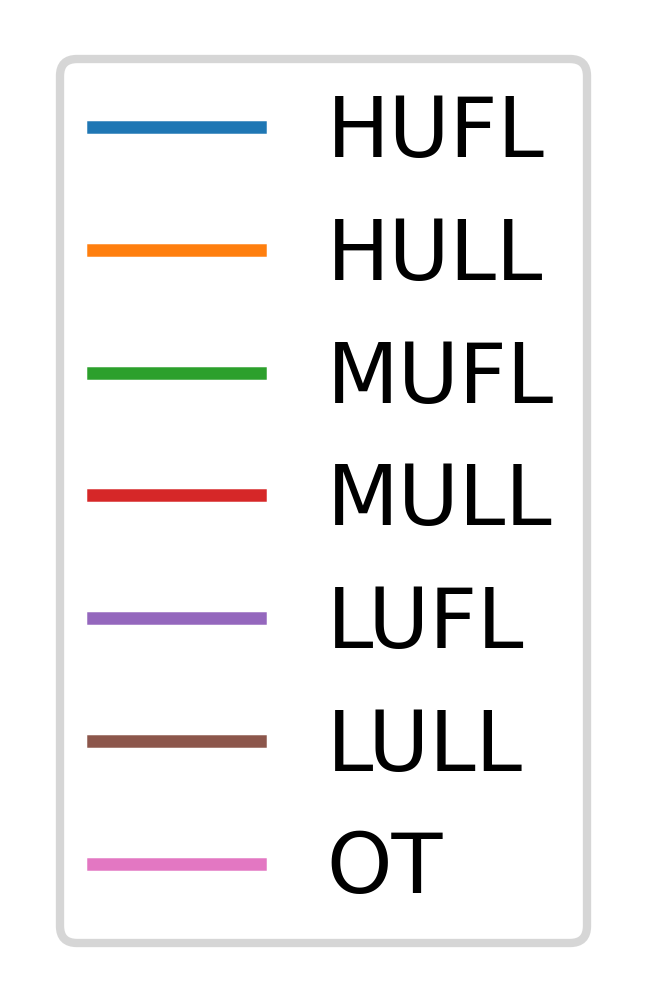

In [178]:
#legend plotting script
plt.figure(figsize=(1, 1), dpi=600)
for column in df.columns:
    plt.plot([], [], label=column)

plt.legend(loc='center')  # Adjust location if needed
plt.axis('off')  # Hide axes
plt.show()